# Q1.2


In [1]:
import numpy as np 
import cv2
from skimage.color import rgb2gray
from skimage import data
import matplotlib.pyplot as plt
from scipy.linalg import svd


shape of U (300, 300)
shape of Singular matrix (300,)
shape of V_transpose (300, 451)


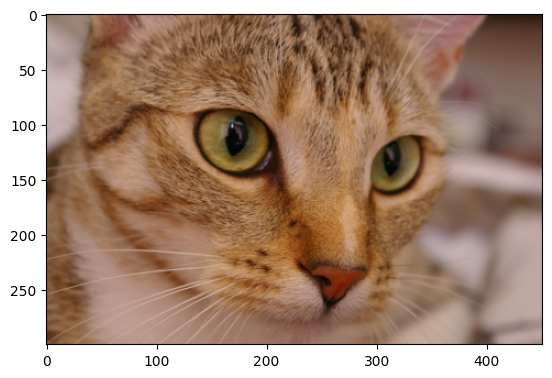

In [2]:
# generating an image for our work
cat = data.chelsea()
plt.imshow(cat)
# converting image to matrix 
gray_cat = rgb2gray(cat)
# shape of our matrix
m,n=gray_cat.shape
# Using SVD to get U,S,V_T 
U, S, V_T = svd(gray_cat,full_matrices=False)
print(f"shape of U {U.shape}")
print(f"shape of Singular matrix {S.shape}")
print(f"shape of V_transpose {V_T.shape}")
# diagonalisation of S matrix 
S = np.diag(S)



In [3]:
# Generating an Ak matrix 
k=225
grayscale_approx=U[:,:k] @ S[0:k, :k] @ V_T[:k, :]
# finding frobius norm of A-Ak norm
grayscale_new=gray_cat-grayscale_approx
fro_norm = np.linalg.norm(grayscale_new, 'fro')
print(f"Forbius norm of A-Ak is {fro_norm}")
spectral_norm=np.linalg.norm(grayscale_new, ord=2)
print(f"Spectral norm of A-Ak is {spectral_norm}")


Forbius norm of A-Ak is 0.6490575762679344
Spectral norm of A-Ak is 0.12472601336544709


In [4]:
# Generating random matrix B
m, n, k = m,n,225
E= np.random.randn(m,k)
F= np.random.randn(k,n)
B = E @ F  
matrix=gray_cat-B
# frobius norm of A-B matrix
fro_norm_new = np.linalg.norm(matrix, 'fro')
print(f"frobius norm of A-B {fro_norm_new}")
spectral_norm_new=np.linalg.norm(matrix, ord=2)
print(f"Spectral norm of A-Ak is {spectral_norm_new}")


frobius norm of A-B 5526.673960299293
Spectral norm of A-Ak is 807.840286632631


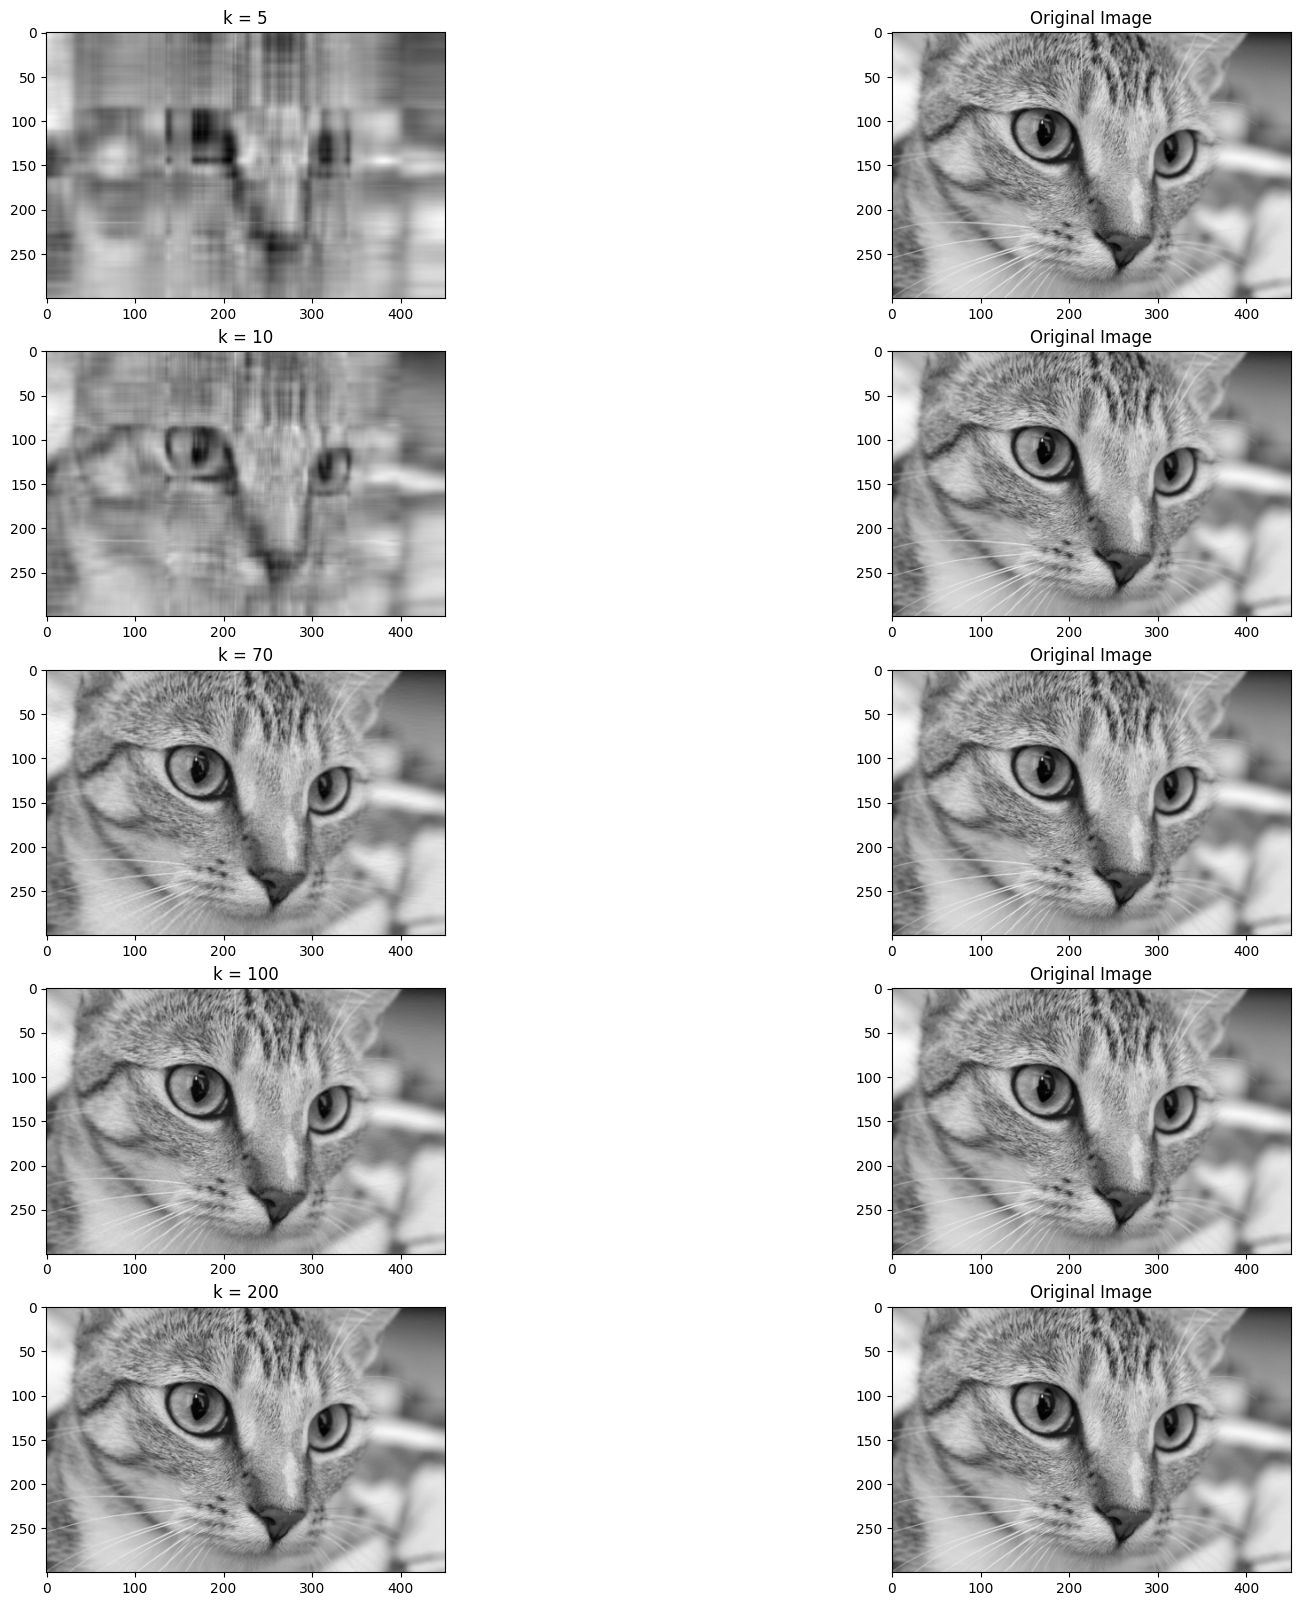

In [5]:
#image quality of different values of K 
fig, ax = plt.subplots(5, 2, figsize=(20, 20))
curr_fig = 0
for r in [5, 10, 70, 100, 200]:
    cat_approx = U[:, :r] @ S[0:r, :r] @ V_T[:r, :]
    ax[curr_fig][0].imshow(cat_approx, cmap='gray')
    ax[curr_fig][0].set_title("k = " + str(r))
    ax[curr_fig][1].set_title("Original Image")
    ax[curr_fig][1].imshow(gray_cat, cmap='gray')
    curr_fig += 1
plt.show()


# Problem 2 
<br>

#### (A) 

$
v_t = \gamma \, v_{t-1} + \eta \nabla w_t
$
<br>

Using the Z-transform  
$
V(z) = \gamma \, z^{-1} \, V(z) + \eta \nabla W(z)
$
<br>

We know frequency response is  
$
H(z) = \frac{Y(z)}{X(z)}
$
<br>

In this case,  $Y(z) = V(z)$   and   $X(z) = \nabla W(z)$   so  $H(z)$  for momentum will be  
$
H(z) = \frac{\eta}{1 - \gamma z^{-1}}
$
<br>

Putting  $z = e^{j \omega}$    
$
H(e^{j \omega}) = \frac{\eta}{1 - \gamma e^{-j \omega}}
$
<br>

Now magnitude response of this will be  
$
|H(e^{j \omega})| = \left| \frac{\eta}{1 - \gamma e^{-j \omega}} \right| 
= \frac{|\eta|}{|1 - \gamma e^{-j \omega}|}
$
<br>
$
= \frac{|\eta|}{|1 - \gamma \cos(\omega) + j \gamma \sin(\omega)|}
$
<br>
$
= \frac{|\eta|}{\sqrt{(1 - \gamma \cos(\omega))^2 + (\gamma \sin(\omega))^2}}
$
<br>
$
= \frac{|\eta|}{\sqrt{1 - 2\gamma \cos(\omega) + \gamma^2}}
$
<br>
for smaller  $ \omega $ $  cos(\omega) \approx 1 $ 
<br> so the denominator wil become  $ |1-\gamma| $ which is small hence gain would be large which is similiar to a low pass filter 
which pass low values in this case gaining low values while neglecting high value as when $ \omega =\pi$ 
<br>  $ H(e^{{j}{\pi}})=\frac{|\eta|}{\sqrt{1 + 2\gamma  + \gamma^2}}=\frac {|\eta|} {|{(1+\gamma)}|}$ since $\gamma$ is small $ |1+\gamma|$ will be large and hence making H(z) small
<br>
By neglecting high values of frequency which represents noise our momentum equation is reducing the noise in our system and hence smoothing the gradient updates and reducing high frequency collisions 

### (b)
$ m_t=\beta m_{t-1}+(1-\beta)grad(\theta_{t-1}) $
<br>
taking z transform we will get $ M(z)=\beta z^{-1} M(z)+(1-\beta)grad (\theta_{t-1}(Z))
 $
<br>
so H(z) will be $ \frac {M(z)}{grad(\theta_{t-1}(Z))} $
<br>
$ H(z)=\frac {1-\beta}{1-\beta z^{-1}} $;
Putting  $z = e^{j \omega}$ 
<br>
$H(e^{j \omega})=\frac{1-\beta}{1 - \beta e^{-j \omega}}$
Now magnitude response of this will be  
$
|H(e^{j \omega})| = \left| \frac{1-\beta}{1 - \beta e^{-j \omega}} \right| 
= \frac{|1-\beta|}{|1 - \beta e^{-j \omega}|}
$
<br>
$
= \frac{|1-\beta|}{|1 - \beta \cos(\omega) + j \beta \sin(\omega)|}
$
<br>
$
= \frac{|1-\beta|}{\sqrt{(1 - \beta \cos(\omega))^2 + (\beta \sin(\omega))^2}}
$
<br>
$
= \frac{|1-\beta|}{\sqrt{1 - 2\beta \cos(\omega) + \beta^2}}
$
<br>
for smaller  $ \omega $ $  cos(\omega) \approx 1 $ 
<br> so the denominator wil become  $ |1-\beta| $ H(z) will become 1 means it is passing our signal which is of low frequency easily 
for noise 
<br> $ H(e^{{j}{\pi}})=\frac{|1-\beta|}{\sqrt{1 + 2\beta  + \beta^2}}=\frac {|1-\beta|} {|{(1+\beta)}|}$ 
<br> if $\beta$ is small  then $ H(e^{{j}{\pi}}) $ will be high meaning slightly attenuating our noise 
but if beta is close to 1 generally in range of (0.9,0.99) $ H(e^{{j}{\pi}}) $ will be low meaning higly attenuating the noise and smoothing the gradient operations


# Problem 4 


we have 
<br>
$
f(x) = (x_1-1)^2+(x_2-1)^2+(x3_1-1)^2
$
<br>
$
h(x) = 2x_1 + 4x_2 - 10,
$
<br>
$
g(x) = 2x_1 + 2x_2 - 4x_3,
$ and 
<br>
$
X = \{ x_1, x_2, x_3 \ | \ x_1 \geq 0, x_2 \geq 0, x_3 \geq 0 \}.
$
<br>
so our problem is converted to
<br>
min f(x)
<br>
s.t. h(x)=0
<br>
$
g(x) \leq 0
$ 
<br>
So our lagrange function will be 
<br>
$\mathcal{L}$ $(x1,x2,x3,\alpha,\beta)=(x_1-1)^2+(x_2-1)^2+(x3_1-1)^2 + \alpha (2x_1 + 4x_2 - 10) + \beta( 2x_1 + 2x_2 - 4x_3)$
<br>
Lagrange dual function wil be
$
q(\alpha, \beta) = \inf_x \mathcal {L}(x, \alpha, \beta)
$
<br>
so we will be minimizing $x_1, x_2, x_3$ first and then plugging into $\mathcal{L}$ to get $q$.
<br>
Then we will be maximizing $\lambda, \mu$ to get the optimal $\lambda, \mu$.
<br>
 $ \frac {\partial \mathcal{L}}{\partial x_1 } = 0 $
<br>
$\Rightarrow 2(x_1-1) + 2\alpha + 2\beta = 0$ $\implies x_1 = 1 - \alpha - \beta$
<br>
 $ \frac {\partial \mathcal{L}}{\partial x_2 } = 0 $
<br>
$\Rightarrow 2(x_2-1) + 4\alpha + 2\beta = 0$ $\implies x_2 = 1 - 2\alpha - \beta$
<br>
 $ \frac {\partial \mathcal{L}}{\partial x_3 } = 0 $
<br>
$\Rightarrow 2(x_3-1) - 4\beta = 0$ $\implies x_3 = 1 + 2\beta$
<br>
Putting all these in $ \mathcal{L}(x_1, x_2, x_3, \alpha, \beta) $ we get $q$
<br>
$
q(\alpha,\beta)=-6 \alpha^2 - 5 \beta^2 -6 \alpha\beta - 4\beta
$
<br>
we will find maximun value of  $ \alpha,\beta $  by differentiating wrt $ \alpha,\beta $
<br>
$ \frac {\partial \mathcal{L}}{\partial \alpha } = 0 $
<br>
$\Rightarrow \alpha^* = -\beta^*/2  $
<br>
$ \frac {\partial \mathcal{L}}{\partial \beta } = 0 $
<br>$\Rightarrow 3\alpha^* = -2 - 5\beta^* $  
<br> solving these two eqn give us $ \alpha^* =2/7$ and  $\beta^* =-4/7 $ which is our optimal solutions 
<br> Let's see if this verifies our conditons of $ x_i \geq 0  $ 
<br> $x_1=1-2/7+4/7 =9/7 >0$  and  $ x_2=1-2/7+8/7=13/7>0 $ and  $x_3= 1-4/7=3/7>0$ so these satisfy our conditions also
<br> $ q(\alpha^*,\beta^*)=-6(2/7)^2-5(-4/7)^2-6(2/7)(-4/7)-4(-4/7)$ => $ q(\alpha^*,\beta^*)=8/7$
<br> now to verify strong duality we will see if $ f(x^*)=q(\alpha^*,\beta^*) $
<br> $ f(x^*)=(x_1^*-1)^2 + (x_2^*-1)^2 +(x_3^*-1)^2 $ so  $f(x^*)=(9/7-1)^2+(13/7-1)^2+(3/7-1)^2=8/7$

<br> hence proved that $ f(x^*)=q(\alpha^*,\beta^*)=8/7 $



